<a href="https://colab.research.google.com/github/18ME10049/Machin_learning-A-Z-Udemy-/blob/master/Sandeep_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [0]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [55]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [56]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**Now Things to remember**
1. In the dataprocessing part we did not apply feature scaling because y was in binary which is already in required range.

2. We have to perform feature scaling before to split the data into training and test set.

3. Now feature scaling was done by standerdScale class that accept a 2-D vector as input so we have to convert y into an 2-D array.

In [57]:
# convetrt y in an 2-D array (input no of rows and no of coloumn)
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()  # sc is object of standardscaler class
sc2 = StandardScaler() 
X = sc1.fit_transform(X)  # by using fit we mean is that sc class will compute mean of array X and transform X in the same manner
# y = sc.transform(y)  This step will be wrong here because sc object has mean of array X so we have to create another object
y = sc2.fit_transform(y)

In [59]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [60]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [61]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')  # rbf is most videly used kernal
svr_reg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [62]:
sc2.inverse_transform(svr_reg.predict(sc1.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

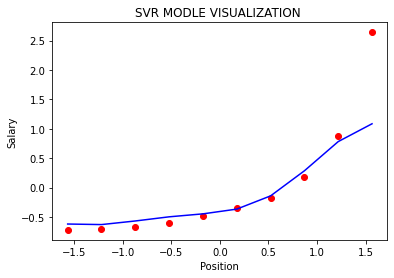

In [63]:
plt.scatter(X,y,color = 'red')
plt.plot(X , svr_reg.predict((X)), color = 'blue')
plt.title("SVR MODLE VISUALIZATION ")
plt.xlabel("Position")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

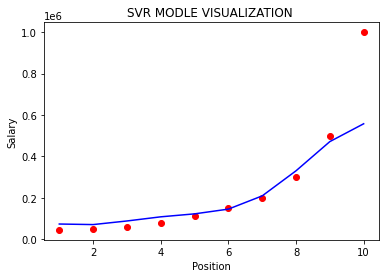

In [64]:
plt.scatter(sc1.inverse_transform(X),sc2.inverse_transform(y),color = 'red')
plt.plot(sc1.inverse_transform(X) , sc2.inverse_transform(svr_reg.predict((X))), color = 'blue')
plt.title("SVR MODLE VISUALIZATION ")
plt.xlabel("Position")
plt.ylabel("Salary")

## Visualising the SVR results (for higher resolution and smoother curve)

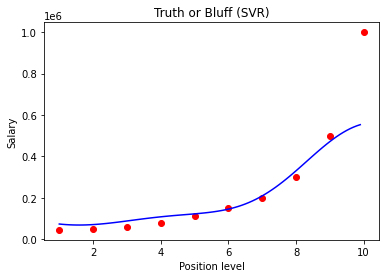

In [67]:
X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc2.inverse_transform(svr_reg.predict(sc1.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()